# DBSCAN (Agrupamiento espacial basado en densidad de aplicaciones con ruido)

### Importamos las librerias necesarias

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons # para generar dataset en forma de lunas
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score # coeficiente de siluata para medir el coeficiente del DBSCAN

### Preparando los datos de prueba

In [5]:
X, y, c = make_blobs(n_samples = 500, cluster_std = 0.8, centers = 4, n_features = 2, return_centers = True, random_state = 42)

df_blobs = pd.DataFrame({
    'x1': X[:, 0],
    'x2': X[:, 1],
    'y': y
})

df_centers = pd.DataFrame({
    'x1': c[:, 0],
    'x2': c[:, 1]
})

In [6]:
X_m, y_m = make_moons(n_samples = 250, noise = 0.05, random_state = 42) # Noise hace referencia al ruido dentro de los datos

df_moons = pd.DataFrame({
    'x1': X_m[:, 0],
    'x2': X_m[:, 1]
})

### Visualización de datos

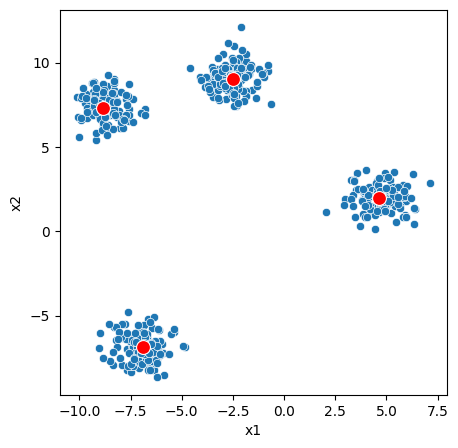

In [7]:
plt.figure(figsize = (5,5))
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2')
sns.scatterplot(data = df_centers, x = 'x1', y = 'x2', markers = 'o', color = 'red', s = 100)
#sns. scatterplot(data = df_moons, x = 'x1', y = 'x2')
plt.show()

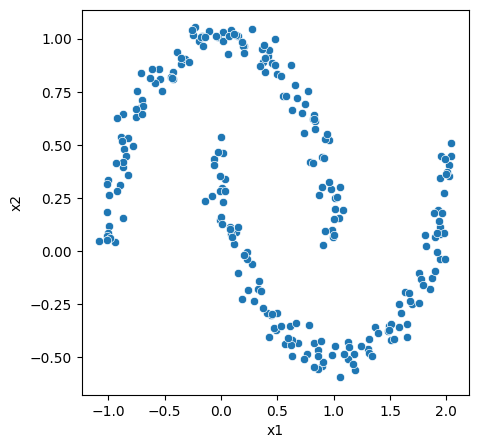

In [8]:
plt.figure(figsize = (5,5))
sns. scatterplot(data = df_moons, x = 'x1', y = 'x2')
plt.show()

**Importante:**

* Para los datos que son circulares es bueno utilizar Kmeans o Hierachical.
* Para datos como luna no sirve utilizar Kmeans, por lo que se DBSCAN es el mejor modelo a utilizar en estosa casos.
* Para DBSCAN es super importante los dos parametros requeridos ya que si el radio es muy grande puede que tengamos un solo cluster o viceversa, como tambien si los minimos vecinos que se requieren son pocos puede generar muchos clusters o viceversa.

### Implementando DBSCAN

In [9]:
dbscan_cluster = DBSCAN(eps = 0.3, min_samples = 3) #eps el radio del circulo y min_samples es le minimo de puntos de vecinos que necesitamos para que queden dentro del cluster o circulo.
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict

<Axes: xlabel='x1', ylabel='x2'>

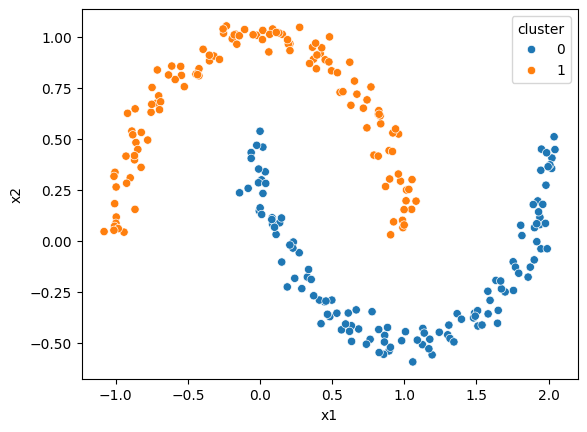

In [10]:
sns.scatterplot(data = df_moons, x = 'x1', y = 'x2', hue = 'cluster')

### Ahora veamos como funciona DBSCAN con datos de forma circular

In [11]:
dbscan = DBSCAN(eps = 1, min_samples = 4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

<Axes: xlabel='x1', ylabel='x2'>

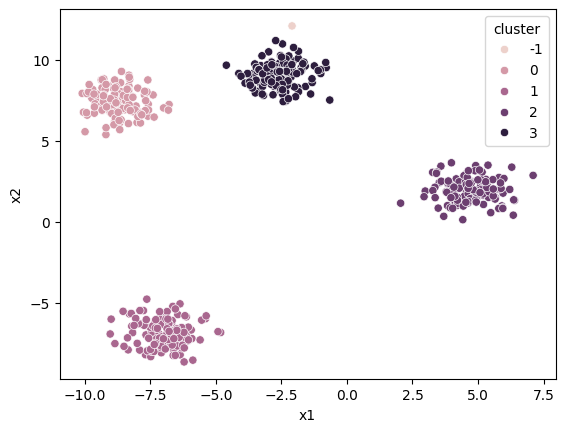

In [12]:
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2', hue = 'cluster')

* El ruido en los clusters se clasifica como "-1".

### Como encontrar los Hiperparametros optimos

In [13]:
from sklearn.neighbors import NearestNeighbors

In [15]:
neighbors = NearestNeighbors(n_neighbors = 3) # n_neighbors tenemos como sacarlo pero deberiamos ir iterando entre 4, 3, 2 que son lo común.
neighbors_fit = neighbors.fit(X)
distance, indices = neighbors_fit.kneighbors(X) # retorna la distancia y los indices de los puntos

In [16]:
distance # dustancia d elos 3 vecinos que dije que queria encontrar

array([[0.        , 0.10187705, 0.17524267],
       [0.        , 0.62080689, 0.7023487 ],
       [0.        , 0.04394921, 0.59277933],
       ...,
       [0.        , 0.14700045, 0.28342456],
       [0.        , 0.15663647, 0.23884087],
       [0.        , 0.1655336 , 0.17295469]])

In [28]:
distance_sort = np.sort(distance, axis = 0)
distance_sort_min = distance_sort[:, 1] # Debido a que la columna 0 es el mismo punto y nosotros necesitamos el mas cercano, utilizamos la columna 1

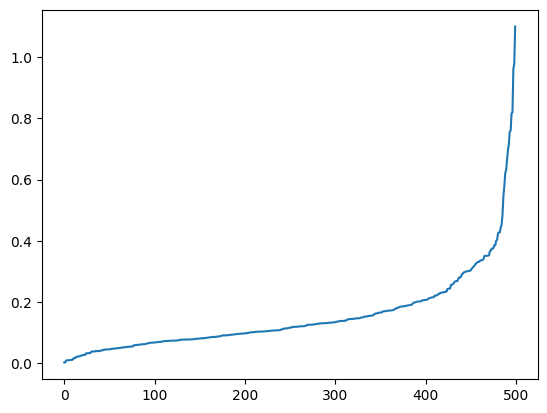

In [29]:
plt.plot(distance_sort_min)

* Esta tecnica se llama la tecnica de la "Rodilla" ya que es de forma ascendente, distinto a la tecnica del codo que es descendente.
* se puede observar que el parametro puede estarn entre 0.2 o 0.5 por decir algo preeliminar.

* vamos a iterar para encontrar el mejor parametro

In [73]:
eps_values = np.arange(0.2, 0.8, 0.05) # agregamos un estimado mayor para asegurarnos de elegir el correcto (0.2 a 0.8)
min_samples = np.arange(2, 10)

In [74]:
eps_values

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 ])

In [75]:
min_samples

array([2, 3, 4, 5, 6, 7, 8, 9])

* Ahora necesitamos llevar los valores a una matriz

In [76]:
from itertools import product

In [77]:
matriz = product(eps_values, min_samples)
matriz_lista = list(matriz)

In [78]:
matriz_lista

[(0.2, 2),
 (0.2, 3),
 (0.2, 4),
 (0.2, 5),
 (0.2, 6),
 (0.2, 7),
 (0.2, 8),
 (0.2, 9),
 (0.25, 2),
 (0.25, 3),
 (0.25, 4),
 (0.25, 5),
 (0.25, 6),
 (0.25, 7),
 (0.25, 8),
 (0.25, 9),
 (0.3, 2),
 (0.3, 3),
 (0.3, 4),
 (0.3, 5),
 (0.3, 6),
 (0.3, 7),
 (0.3, 8),
 (0.3, 9),
 (0.35, 2),
 (0.35, 3),
 (0.35, 4),
 (0.35, 5),
 (0.35, 6),
 (0.35, 7),
 (0.35, 8),
 (0.35, 9),
 (0.39999999999999997, 2),
 (0.39999999999999997, 3),
 (0.39999999999999997, 4),
 (0.39999999999999997, 5),
 (0.39999999999999997, 6),
 (0.39999999999999997, 7),
 (0.39999999999999997, 8),
 (0.39999999999999997, 9),
 (0.44999999999999996, 2),
 (0.44999999999999996, 3),
 (0.44999999999999996, 4),
 (0.44999999999999996, 5),
 (0.44999999999999996, 6),
 (0.44999999999999996, 7),
 (0.44999999999999996, 8),
 (0.44999999999999996, 9),
 (0.49999999999999994, 2),
 (0.49999999999999994, 3),
 (0.49999999999999994, 4),
 (0.49999999999999994, 5),
 (0.49999999999999994, 6),
 (0.49999999999999994, 7),
 (0.49999999999999994, 8),
 (0.4999999

In [79]:
sil_score = []

for i in matriz_lista:
    y_pred = DBSCAN(eps = i[0], min_samples = i[1]).fit_predict(X)
    sil_score.append(silhouette_score(X, y_pred))

In [80]:
sil_score # Indices de silueta

[0.11697646101931357,
 -0.03610925804392603,
 -0.2116537129230683,
 -0.44767988387874413,
 -0.6114659561332112,
 -0.7006542721792596,
 -0.6020161861616641,
 -0.23667404869871814,
 -0.046798141237769805,
 -0.12333266306726046,
 -0.1553407801690662,
 -0.1891534354051496,
 -0.3158948082888347,
 -0.42918864474780405,
 -0.5264193773436934,
 -0.6621321333674864,
 -0.03220358045625132,
 -0.03969250435874687,
 -0.024860527584931773,
 0.04315218985008991,
 0.0034179917816963916,
 -0.20085925888058354,
 -0.24629720295935437,
 -0.39557908746053033,
 0.031230127714502426,
 0.16315012658558875,
 0.3256366983727964,
 0.24468758039477678,
 0.2135505520080537,
 0.25383689618418237,
 0.2137365629622373,
 0.005024134328331291,
 0.11431354125393313,
 0.24182947057599474,
 0.42115966782283054,
 0.41174898283860795,
 0.4156161851166536,
 0.47143967707404016,
 0.4266654664344042,
 0.3677923009712532,
 0.19079452417659748,
 0.33406662433049283,
 0.5570648999370204,
 0.4642444210957724,
 0.6169482090665697,
 

In [81]:
df_params = pd.DataFrame(matriz_lista, columns = ['Eps', 'Min_samples']) # nuestras variables las dejamos como un dataframe
df_params['sil_scores'] = sil_score # Agregamos los coeficientes de siluestas

In [82]:
df_params

,Eps,Min_samples,sil_scores
0,0.2,2,0.116976
1,0.2,3,-0.036109
2,0.2,4,-0.211654
3,0.2,5,-0.447680
4,0.2,6,-0.611466
...,...,...,...
99,0.8,5,0.806944
100,0.8,6,0.801536
101,0.8,7,0.795582
102,0.8,8,0.795582


* Ahora pivoteamos para vwer de mejor forma la información

In [83]:
pivot_data = pd.pivot_table(data = df_params, index = 'Min_samples', columns = 'Eps', values = 'sil_scores')
pivot_data

Eps,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80
Min_samples,,,,,,,,,,,,,
2,0.116976,-0.046798,-0.032204,0.031230,0.114314,0.190795,0.215334,0.386496,0.656109,0.671273,0.668666,0.663743,0.678403
3,-0.036109,-0.123333,-0.039693,0.163150,0.241829,0.334067,0.384597,0.514614,0.654911,0.790896,0.793646,0.796209,0.806944
4,-0.211654,-0.155341,-0.024861,0.325637,0.421160,0.557065,0.611104,0.756089,0.772133,0.790265,0.793778,0.796209,0.806944
5,-0.447680,-0.189153,0.043152,0.244688,0.411749,0.464244,0.600182,0.746750,0.767110,0.780621,0.793778,0.796209,0.806944
6,-0.611466,-0.315895,0.003418,0.213551,0.415616,0.616948,0.674557,0.710585,0.760448,0.770446,0.785753,0.790978,0.801536
7,-0.700654,-0.429189,-0.200859,0.253837,0.471440,0.597370,0.655534,0.692865,0.734663,0.763602,0.769427,0.789642,0.795582
8,-0.602016,-0.526419,-0.246297,0.213737,0.426665,0.537848,0.618730,0.679579,0.734663,0.755964,0.766545,0.781762,0.795582
9,-0.236674,-0.662132,-0.395579,0.005024,0.367792,0.484903,0.574803,0.667453,0.726245,0.755964,0.766545,0.781191,0.795582


<Axes: xlabel='Eps', ylabel='Min_samples'>

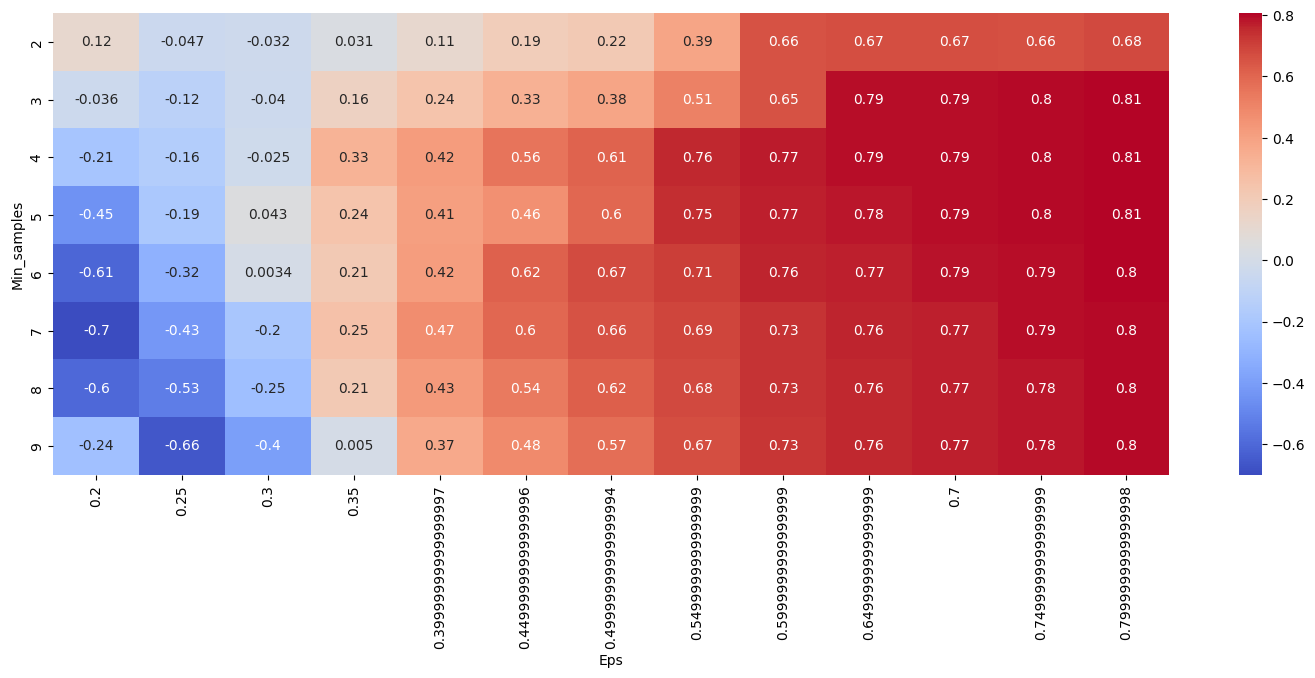

In [84]:
plt.figure(figsize = (18, 6))
sns.heatmap(pivot_data, annot = True, annot_kws = {'size': 10}, cmap = 'coolwarm')

* podemos observar que el min_samples puede ser de 3 a 5 y con un EPS de 0.65 en adelante se comporta muy bien.
* de preferencia utilizaría un min_samples de 3 y un EPS de 0.8

### Evaluación de DBSCAN

In [87]:
DBSCAN_cluster = DBSCAN(eps = 0.8, min_samples = 3)
y_pred = DBSCAN_cluster.fit_predict(X)
df_blobs['cluster_optimizado'] = y_pred

In [88]:
df_blobs

,x1,x2,y,cluster,cluster_optimizado
0,-7.918909,6.760982,3,0,0
1,-9.037137,-6.923545,2,1,1
2,6.391721,1.326531,1,2,2
3,-2.822884,7.843474,0,3,3
4,-5.918656,-7.206570,2,1,1
...,...,...,...,...,...
495,-7.718843,8.063230,3,0,0
496,-2.570879,9.287208,0,3,3
497,-7.148255,-5.544892,2,1,1
498,-7.297806,-6.040902,2,1,1


<Axes: xlabel='x1', ylabel='x2'>

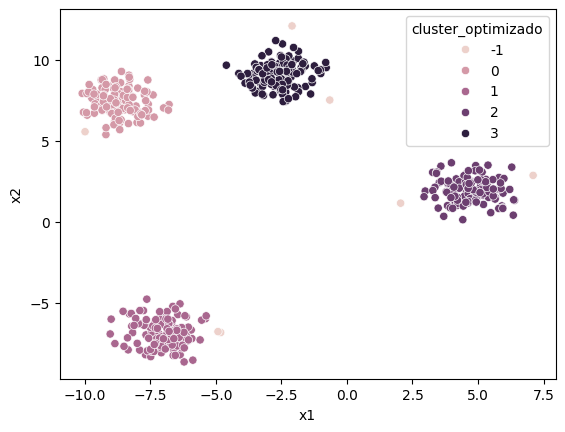

In [89]:
sns.scatterplot(data = df_blobs, x = 'x1', y = 'x2', hue = 'cluster_optimizado')

* Desde la pagina : https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html   obtenemos la funciona a utilizar el grafico de siluetas.

For n_clusters = 5 The average silhouette_score is : 0.8069438719653603


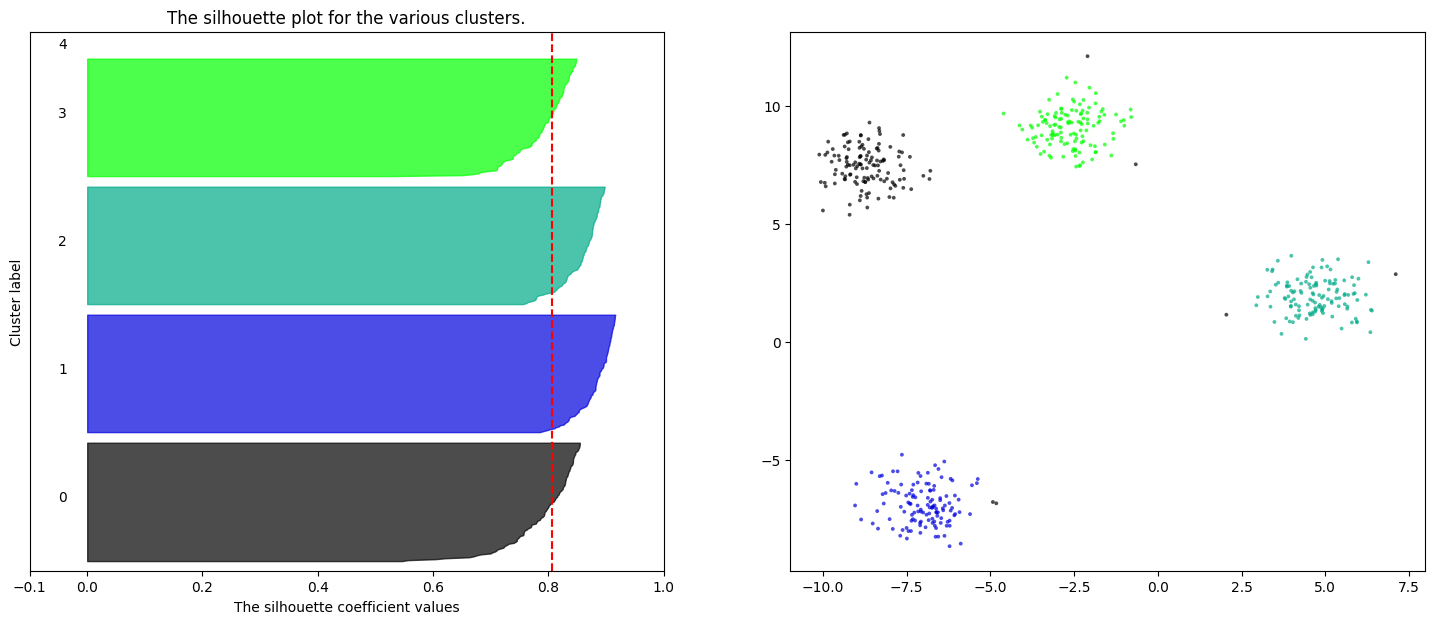

In [91]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = DBSCAN(eps=0.8, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)


plt.show()

* se puede observar un buen coeficiente de silueta (0.8069) el cual